In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
%matplotlib notebook

In [114]:
mouse_df = pd.read_csv("./data/Mouse_metadata.csv")
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [115]:
results_df = pd.read_csv("./data/Study_results.csv")
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [116]:
comb_data = pd.merge(results_df, mouse_df, how="left", on="Mouse ID")

In [117]:
comb_data.drop_duplicates(subset=["Timepoint"]).groupby("Mouse ID")
comb_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [138]:
comb_data['Mouse ID'].nunique()

249

In [128]:
comb_data.loc[comb_data['Mouse ID'] == ("g989")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [129]:
newc=comb_data.drop([137])
newc

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [139]:
newc['Mouse ID'].nunique()

249

## Summary Statistics

In [187]:
#find avg tumor
avg_tum=newc.groupby('Drug Regimen').mean()
pd.DataFrame(avg_tum)

#create df 
avg_tum_tv=avg_tum['Tumor Volume (mm3)']
avg_tum_df=pd.DataFrame(avg_tum_tv)
avg_tum_df

#rename columns
cavg_tum_df=avg_tum_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
pd.DataFrame(cavg_tum_df)

#find median tumor
med_tum=newc.groupby('Drug Regimen').median()
pd.DataFrame(med_tum)

#create df 
med_tum_tv=med_tum['Tumor Volume (mm3)']
med_tum_df=pd.DataFrame(med_tum_tv)

#change column names
cmed_tum_df=med_tum_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
pd.DataFrame(cmed_tum_df)

#merge mean and median tables
study_data_complete = pd.merge(cavg_tum_df, cmed_tum_df, how="left", on="Drug Regimen")
study_data_complete

###

#find tumor variance
var_tum=newc.groupby('Drug Regimen').var()
pd.DataFrame(var_tum)

#create df 
var_tum_tv=var_tum['Tumor Volume (mm3)']
var_tum_df=pd.DataFrame(var_tum_tv)
var_tum_df

#rename column
cvar_tum_df=var_tum_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
pd.DataFrame(cvar_tum_df)

#merge tables
study_data_complete1 = pd.merge(study_data_complete, cvar_tum_df, how="left", on="Drug Regimen")
study_data_complete1

###

#find tumor standard deviation
std_tum=newc.groupby('Drug Regimen').std()
pd.DataFrame(std_tum)

#create df 
std_tum_tv=std_tum['Tumor Volume (mm3)']
std_tum_df=pd.DataFrame(std_tum_tv)
std_tum_df

#rename column
cstd_tum_df=std_tum_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume St. Dev."})
pd.DataFrame(cstd_tum_df)

#merge tables
study_data_complete2 = pd.merge(study_data_complete1, cstd_tum_df, how="left", on="Drug Regimen")
study_data_complete2

###

#find tumor standard error
stderr_tum=newc.groupby('Drug Regimen').sem()
pd.DataFrame(stderr_tum)

#create df 
stderr_tum_tv=stderr_tum['Tumor Volume (mm3)']
stderr_tum_df=pd.DataFrame(stderr_tum_tv)

#rename column
cstderr_tum_df=stderr_tum_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume St. Error"})
pd.DataFrame(cstderr_tum_df)

#merge tables
study_data_complete3 = pd.merge(study_data_complete2, cstderr_tum_df, how="left", on="Drug Regimen")
study_data_complete3

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [190]:
comb_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [205]:
drug_group = comb_data.groupby('Drug Regimen')

# Count how many times each maker appears in our group
count_drugs = drug_group['Drug Regimen'].count()

count_drugs_df=pd.DataFrame(count_drugs)
count_drugs_df

,Drug Regimen
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


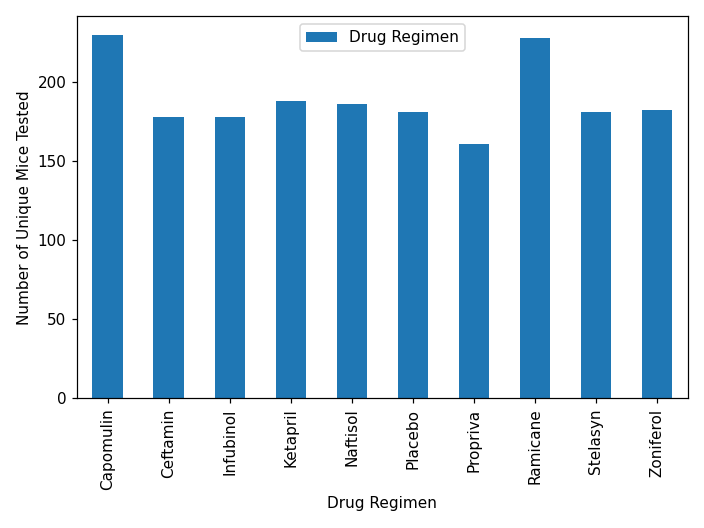

<AxesSubplot:xlabel='Drug Regimen'>

In [203]:
count_drugs_df.plot.bar()

<IPython.core.display.Javascript object>


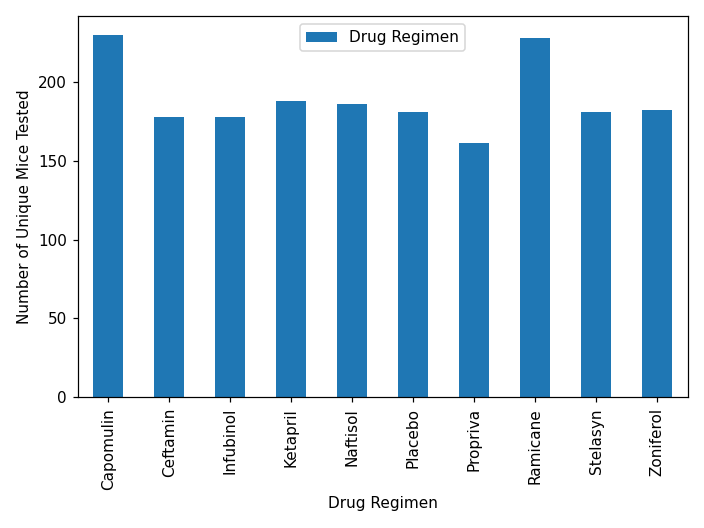

In [208]:
# Create a bar chart based off of the group series from before
count_chart = count_drugs_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Unique Mice Tested")


plt.show()
plt.tight_layout()